# Aprendizaje No Supervisado

Dataset:
[Mall Customer Segmentation Data](https://https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv)

Team: Leilani A. y Maria Jose E.

### Exploración de Datos:

In [70]:
from google.colab import drive
drive.mount('/content/drive')

# ROUTE
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from mpl_toolkits.mplot3d import Axes3D


# DATAFRAME
df = pd.read_csv('Mall_Customers.csv', encoding='utf-8', encoding_errors='replace')
# df = pd.read_csv('Mall_Customers.txt', encoding='utf-8', encoding_errors='replace')

# SIZE OF  df
print("Tamaño df:\n", df.shape)

# COLUMN NAMES
print("Columnas del df:\n", df.columns)

# FIRST TEN ROWS
df.head(10)

Tamaño df:
 (200, 5)
Columnas del df:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [72]:
# CHECK FOR NANS
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### Analisis de Datos

Variables Categoricas:
* Gender
* CustomerID


Variables Numericas:
* Age
* Annual Income (k$)
* Spending Score (1-100)

In [73]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [74]:
df.describe().astype(int)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In [75]:
# SUMMARY
df.info()

#print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
from pandas.io.formats.info import DataFrameInfo

# INFORMATION FROM .info()
info = DataFrameInfo(data=df)
# CREATE NEW PANDAS DF
infodf = pd.DataFrame(
  {'Column': info.ids,
   'Non-Null Count':info.non_null_counts,
   'Dtype':info.dtypes})

# ORDER BY TYPE
infodf.sort_values(by='Dtype')

,Column,Non-Null Count,Dtype
CustomerID,CustomerID,200,int64
Age,Age,200,int64
Annual Income (k$),Annual Income (k$),200,int64
Spending Score (1-100),Spending Score (1-100),200,int64
Gender,Gender,200,object


                             Age  Spending Score (1-100)  Annual Income (k$)
Age                     1.000000               -0.327227           -0.012398
Spending Score (1-100) -0.327227                1.000000            0.009903
Annual Income (k$)     -0.012398                0.009903            1.000000 



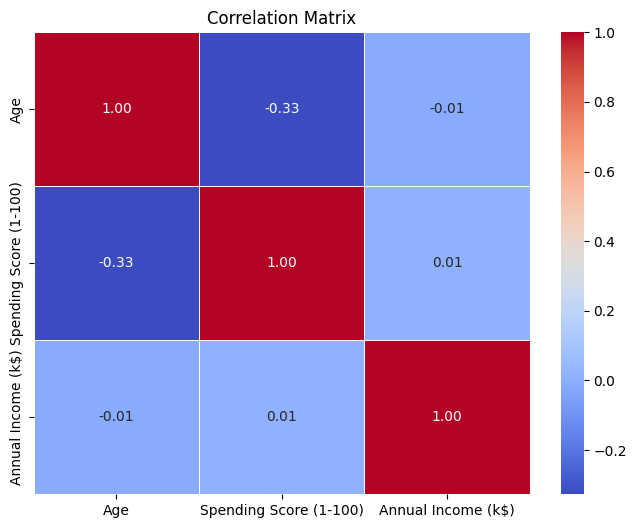

In [77]:
# CORRELATION MAXTRIX
# CORR() -> CALCULATES THE PEARSON CORRELATION OF THESE COLUMNS
correlation_matrix = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].corr()

# Display the correlation matrix
print(correlation_matrix , "\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

No hay ninguna correlacion alta entre variables, sin embargo podemos concluir que:

* Age y Spending Score (1-100): Cuando la edad incrementa, el spending score disminuye.

* Age y Annual Income: Al ser tan cerca a 0, nos indica que la edad no tiene un impacto en el income de la persona.

* Annual Income y Spending Score (1-100): El income no tiene impacto en el Spending Score.

Gender
Female    112
Male       88
Name: count, dtype: int64 

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64 



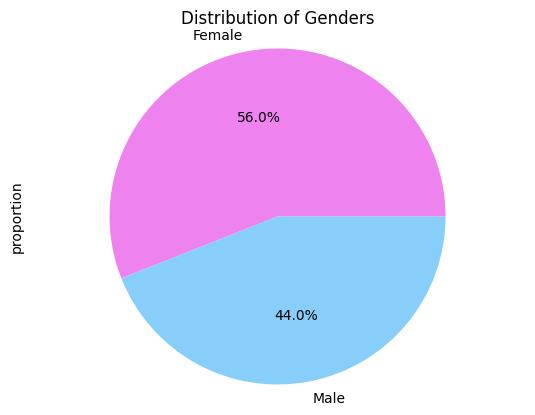

In [78]:
# CALCULATE THE FREQUENCY & % OF EACH GENDER
print(df['Gender'].value_counts(), '\n')
print(df['Gender'].value_counts(normalize=True,), '\n')

# VISUALIZE THE DISTRIBUTION OF GENDERS
df['Gender'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=['violet', 'lightskyblue'])
plt.title('Distribution of Genders')
plt.axis('equal')
plt.show()

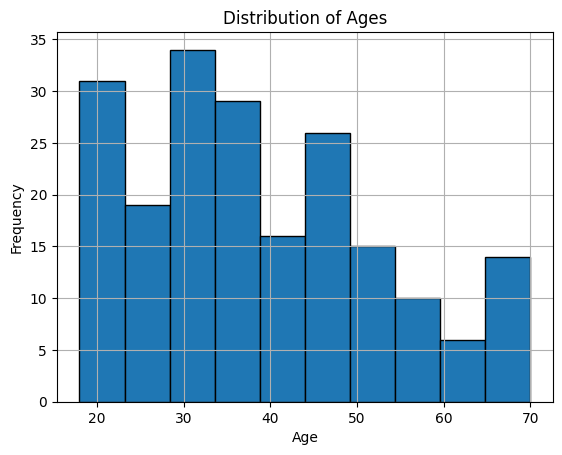

In [79]:
# VISUALIZE THE DISTRIBUTION OF AGES
df['Age'].hist(edgecolor='black', linewidth=1)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The peak of the age distribution is at 32 years. 



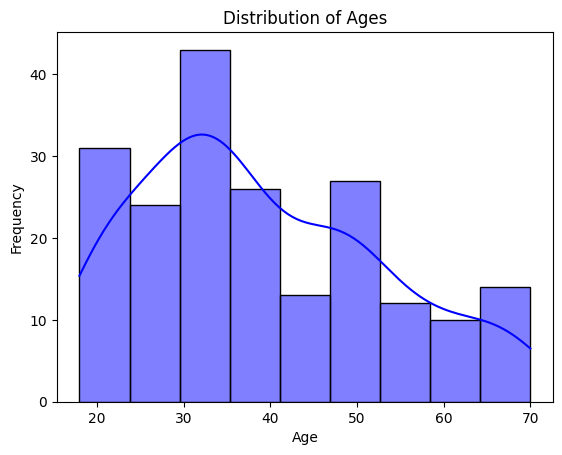

In [80]:
# VISUALIZE THE DISTRIBUTION OF AGES
# import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import mode
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Age'], kde=True, color = 'blue', ax=axs)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# PEAK
age_mode = mode(df['Age'])[0]
print(f"The peak of the age distribution is at {age_mode} years.", "\n")

plt.show()

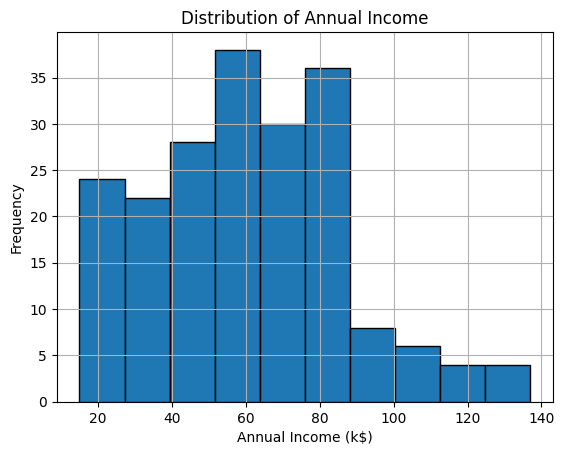

In [81]:
# VISUALIZE THE DISTRIBUTIONS OF ANNUAL INCOME
df['Annual Income (k$)'].hist(edgecolor='black', linewidth=1)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

The peak of the Annual Income (k$) distribution is at 54k dollars. 



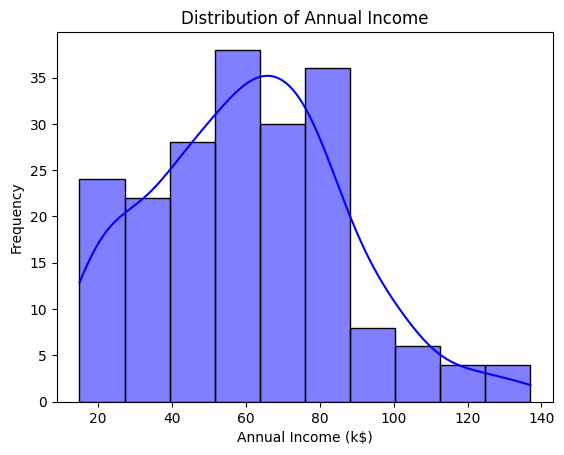

In [82]:
# VISUALIZE THE DISTRIBUTIONS OF ANNUAL INCOME
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Annual Income (k$)'], kde=True, color = 'blue', ax=axs)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# PEAK
annual_income_mode = mode(df['Annual Income (k$)'])[0]
print(f"The peak of the Annual Income (k$) distribution is at {annual_income_mode}k dollars.", "\n")

plt.show()

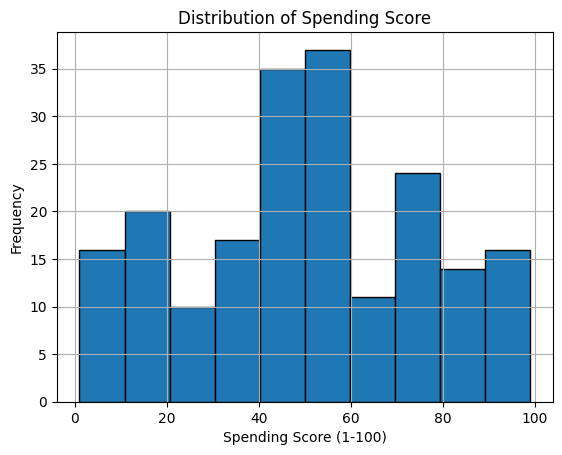

In [83]:
# VISUALIZE THE DISTRIBUTIONS OF SPENDING SCORE
df['Spending Score (1-100)'].hist(edgecolor='black', linewidth=1)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

The peak of the Spending Score (1-100) distribution is at 42. 



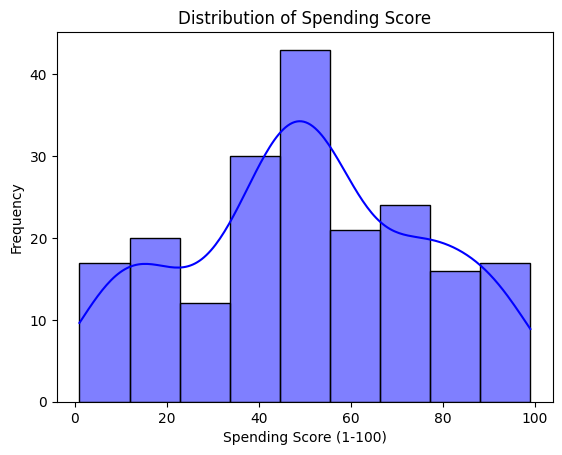

In [84]:
# VISUALIZE THE DISTRIBUTIONS OF SPENDING SCORE
fig, axs = plt.subplots(1, 1)

sns.histplot(df['Spending Score (1-100)'], kde=True, color = 'blue', ax=axs)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# PEAK
spending_score_mode = mode(df['Spending Score (1-100)'])[0]
print(f"The peak of the Spending Score (1-100) distribution is at {spending_score_mode}.", "\n")

plt.show()

### Estandarizar

Para normalizar la data usando la estandarizacion, tenemos que extraer la media y dividirla por la desviacion standard de cada caracteristica ['Age', 'Spending Score (1-100)', 'Annual Income (k$)']. El resultado sera que cada caracteristica tenga una media de 0 y desviacion standard de 1.

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# FEAUTURES
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Estandarizacion
# CREATE A STANDARDSCALER OBJECT
scaler = StandardScaler()
# FIT & TRANSFORM THE DATA
features_scaled = scaler.fit_transform(features)

print(features_scaled)

[[-1.42456879 -0.43480148 -1.73899919]
 [-1.28103541  1.19570407 -1.73899919]
 [-1.3528021  -1.71591298 -1.70082976]
 [-1.13750203  1.04041783 -1.70082976]
 [-0.56336851 -0.39597992 -1.66266033]
 [-1.20926872  1.00159627 -1.66266033]
 [-0.27630176 -1.71591298 -1.62449091]
 [-1.13750203  1.70038436 -1.62449091]
 [ 1.80493225 -1.83237767 -1.58632148]
 [-0.6351352   0.84631002 -1.58632148]
 [ 2.02023231 -1.4053405  -1.58632148]
 [-0.27630176  1.89449216 -1.58632148]
 [ 1.37433211 -1.36651894 -1.54815205]
 [-1.06573534  1.04041783 -1.54815205]
 [-0.13276838 -1.44416206 -1.54815205]
 [-1.20926872  1.11806095 -1.54815205]
 [-0.27630176 -0.59008772 -1.50998262]
 [-1.3528021   0.61338066 -1.50998262]
 [ 0.94373197 -0.82301709 -1.43364376]
 [-0.27630176  1.8556706  -1.43364376]
 [-0.27630176 -0.59008772 -1.39547433]
 [-0.99396865  0.88513158 -1.39547433]
 [ 0.51313183 -1.75473454 -1.3573049 ]
 [-0.56336851  0.88513158 -1.3573049 ]
 [ 1.08726535 -1.4053405  -1.24279661]
 [-0.70690189  1.23452563

Tambien podriamos usar Estandarizacion Min-Max, esto reduciria las caracteristicas a un intervalo en comun entre 0 y 1.

```
from sklearn.preprocessing import MinMaxScaler
# FEAUTURES
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
# FIT & TRANSFORM THE DATA
features_scaled = scaler.fit_transform(features)
```



In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

# Features y Estandarizacion
features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]  # Extraer los features
scaler = StandardScaler()  # Estandarizacion
features_scaled = scaler.fit_transform(features)  # Estandarizacion

The optimal number of clusters is: 4 



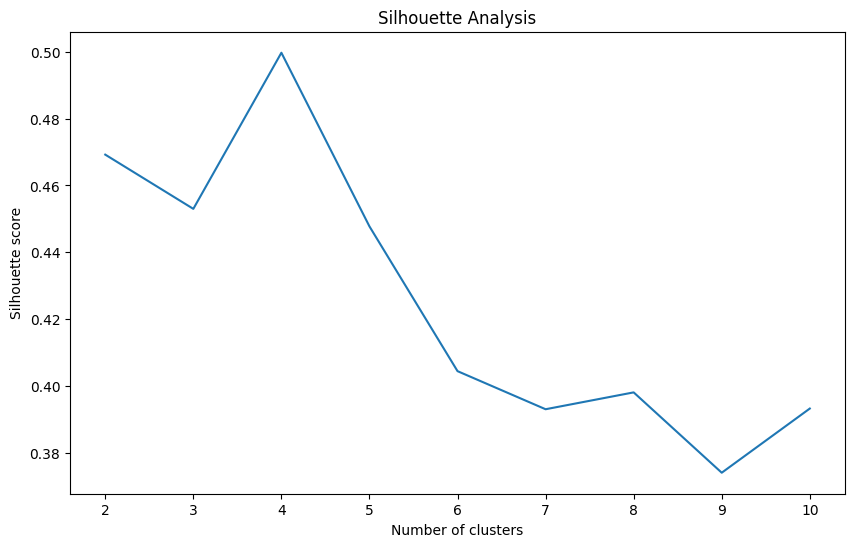

In [87]:
from sklearn.metrics import silhouette_score
# GET NUMBER OF CLUSTERS USING SILHOUTTE SCORE
silhouette_scores = []

# FOR LOOP THROUGH THE NUMBER OF CLUSTERS 2-10
for n_clusters in range(2, 11):
  # KMEANS MODEL
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # FIT THE MODEL
    kmeans.fit(df[['Age', 'Spending Score (1-100)']])

    # CALCULATE USING THE SILHOUTTER SCORE
    score = silhouette_score(df[['Age', 'Spending Score (1-100)']], kmeans.labels_)
    silhouette_scores.append(score)

# FIND THE INDEX OF THE MAX
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"The optimal number of clusters is: {optimal_clusters} \n")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### K-Means de variable numericas

In [88]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
ykmeans = kmeans.predict(features_scaled)
y_kmeans = kmeans.labels_

# Añade etiqueda del cluster donde fila se encuentra
df['Cluster'] = kmeans.labels_ + 1

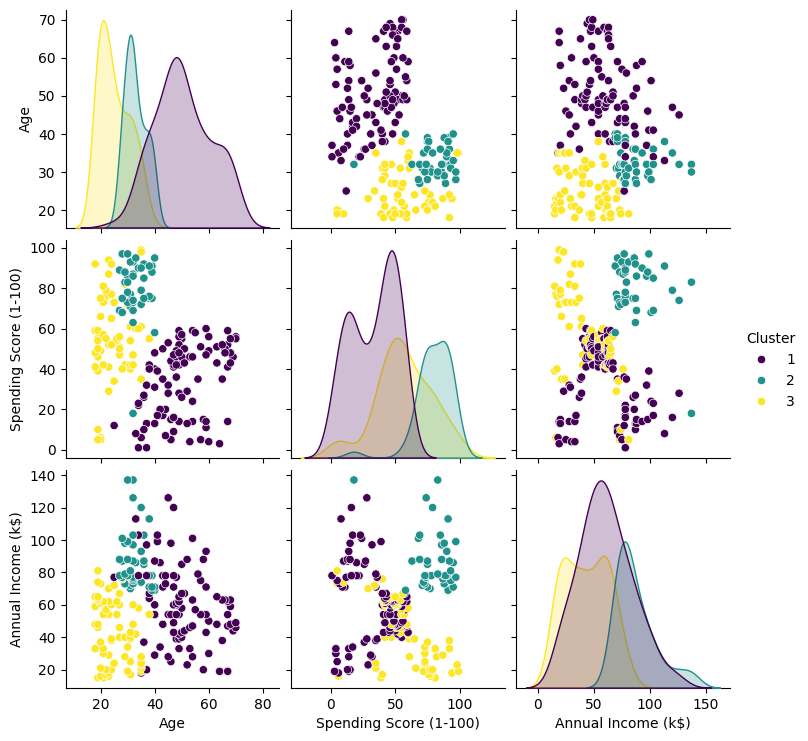

In [89]:
# cluster 3 atravez de las variables
sns.pairplot(df, vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'], hue='Cluster', palette='viridis')
plt.show()

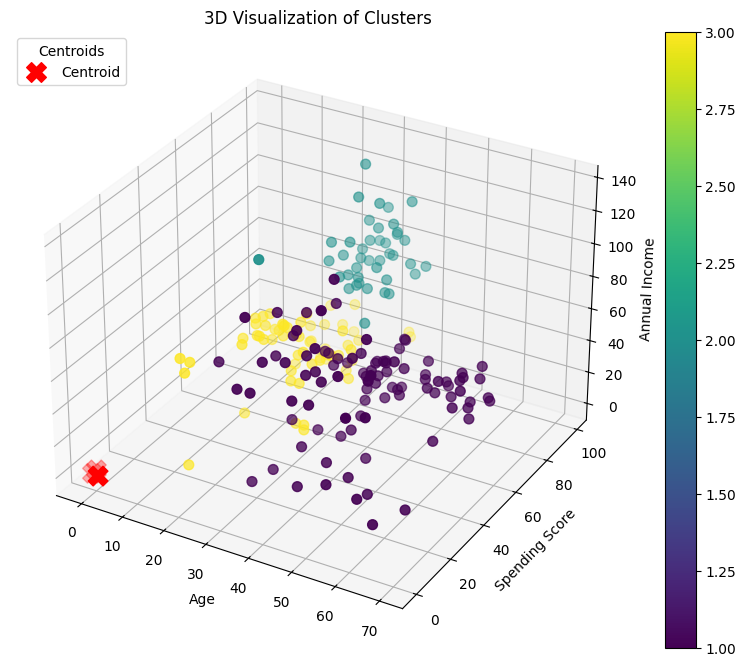

In [90]:
centroids = kmeans.cluster_centers_

# Creacion de un scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'],
    c=df['Cluster'], cmap='viridis', s=50)

# Centroides
ax.scatter(
    centroids[:, 0],  # Centroid Age
    centroids[:, 1],  # Centroid Spending Score
    centroids[:, 2],  # Centroid Annual Income
    c='red',
    s=200,
    marker='X',
    label='Centroid'
)

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
plt.title('3D Visualization of Clusters')
plt.colorbar(scatter)
ax.legend(loc='upper left', title='Centroids')

plt.show()

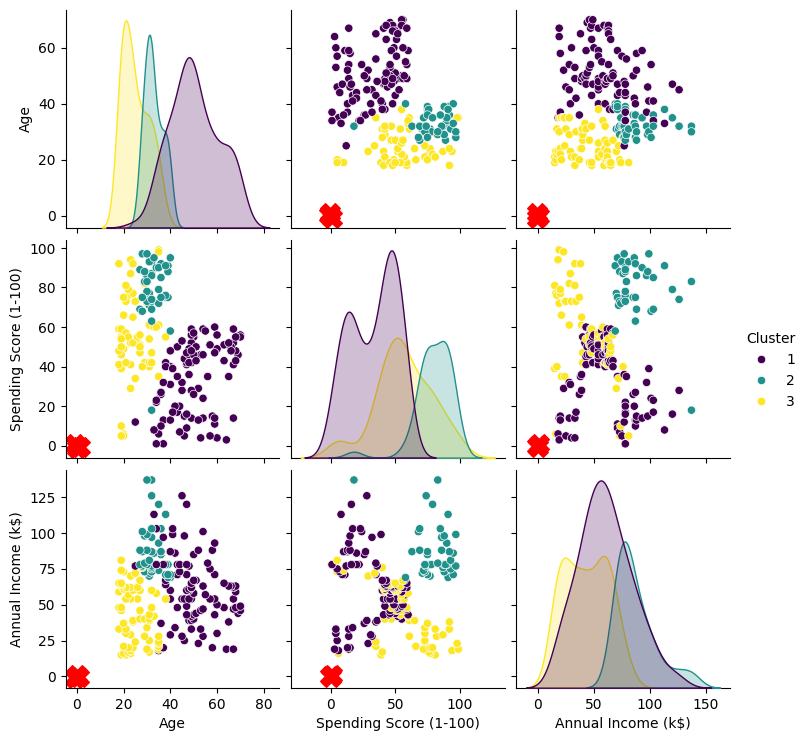

In [91]:
#features = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]
#kmeans = KMeans(n_clusters=3, random_state=42)
#kmeans.fit(features)
#df['Cluster'] = kmeans.labels_ + 1
#centroids = kmeans.cluster_centers_

# Create the pairplot
pairplot = sns.pairplot(
    df,
    vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'],
    hue='Cluster',
    palette='viridis'
)

# NESTED LOOPS
for i, x_var in enumerate(['Age', 'Spending Score (1-100)', 'Annual Income (k$)']):
    for j, y_var in enumerate(['Age', 'Spending Score (1-100)', 'Annual Income (k$)']):
        if i != j:  # Only add centroids to scatterplots (not diagonal histograms)
            ax = pairplot.axes[i, j]
            ax.scatter(
                centroids[:, features.columns.get_loc(x_var)],  # X-coordinates of centroids
                centroids[:, features.columns.get_loc(y_var)],  # Y-coordinates of centroids
                c='red',
                s=200,
                marker='X',
                label='Centroid'
            )

            # Add legend only once per subplot
            handles, labels = ax.get_legend_handles_labels()
            if 'Centroid' not in labels:
                ax.legend(handles + [plt.Line2D([], [], color='red', marker='X', markersize=10, linestyle='None', label='Centroid')])

plt.show()

### Método Codo

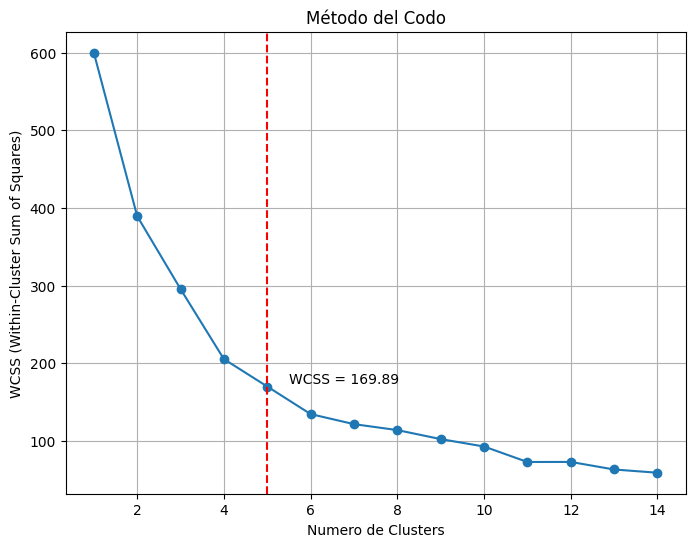

In [92]:
# WITHIN-CLUSTER SUM OF SQUARES: measure of the compactness or tightness of the clusters.
wcss = []
# TEST THE NUMBER OF CLUSTERS
k_range = range(1, 15)
# FOR LOOP
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')

optimal_k = 5  # Linea roja
# GET THE WCSS FOR THE OPTIMAL NUMBER OF CLUSTERS
optimal_wcss = wcss[optimal_k - 1]
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Codo en k={optimal_k}')
plt.text(optimal_k + 0.5, optimal_wcss, f'WCSS = {optimal_wcss:.2f}', ha='left', va='bottom')

plt.title('Método del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


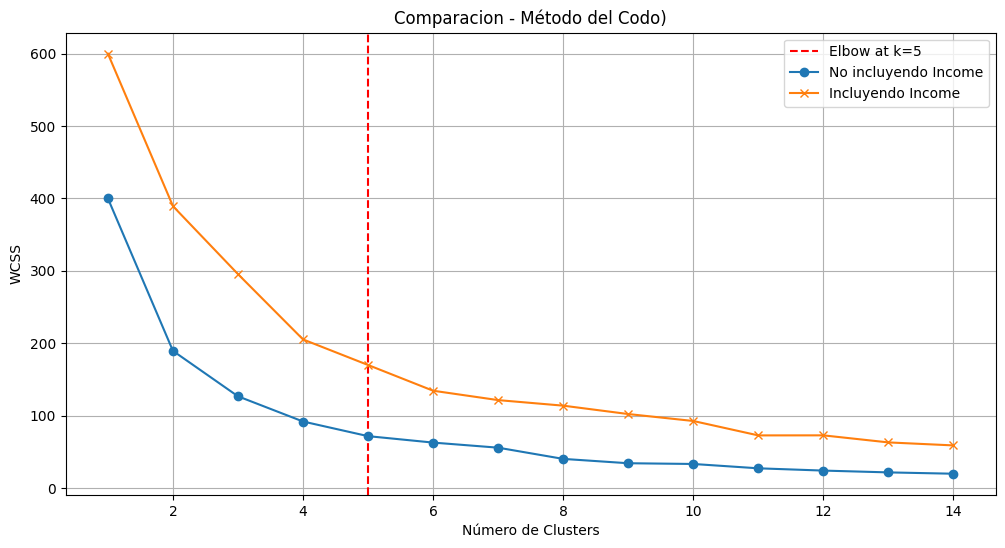

In [93]:
# Comparacion entre incluyir Annual Income o no

# Features: Age y Spending Score
features1 = df[['Age', 'Spending Score (1-100)']]

# Features: Age, Spending Score y Income
features2 = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Estandarizar ambos
scaler = StandardScaler()
features1_scaled = scaler.fit_transform(features1)
features2_scaled = scaler.fit_transform(features2)

wcss1, wcss2 = [], []
k_range = range(1, 15)
for k in k_range:
    kmeans1 = KMeans(n_clusters=k, random_state=42)
    kmeans1.fit(features1_scaled)
    wcss1.append(kmeans1.inertia_)

    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(features2_scaled)
    wcss2.append(kmeans2.inertia_)


plt.figure(figsize=(12, 6))

# linea roja
elbow_k = 5
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at k={elbow_k}')

# plot para el metodo del codo
plt.plot(k_range, wcss1, marker='o', label='No incluyendo Income')
plt.plot(k_range, wcss2, marker='x', label='Incluyendo Income')
plt.title('Comparacion - Método del Codo)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid()
plt.show()


Esta comparacion nos permite ver el rendimiento del K-Means clustering algorithm cuando se incluye o se excluye la característica Annual Income. Nuestro objetivo es determinar si la incorporación de la característica Annual Income (k$) mejora el rendimiento del clustering o no.

### K-Means y Analisis

#### K-Means despues del Método del Codo

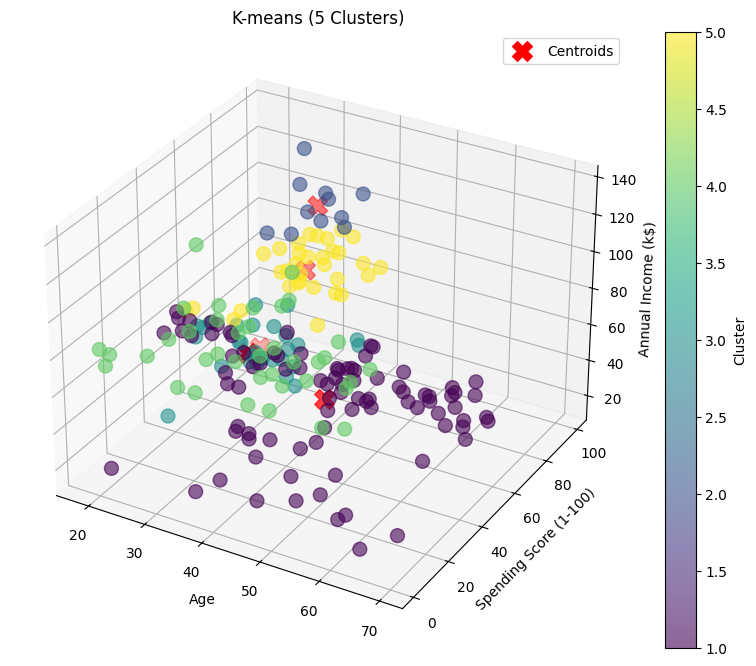

In [94]:
# Aplicar K-means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']])

# Asignar el numero del cluster que la fila pertenece
df['Cluster'] = kmeans.labels_ + 1

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['Age'], df['Spending Score (1-100)'], df['Annual Income (k$)'],
                c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')


ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
ax.set_title('K-means (5 Clusters)')
fig.colorbar(sc, label='Cluster')
plt.legend()
plt.show()


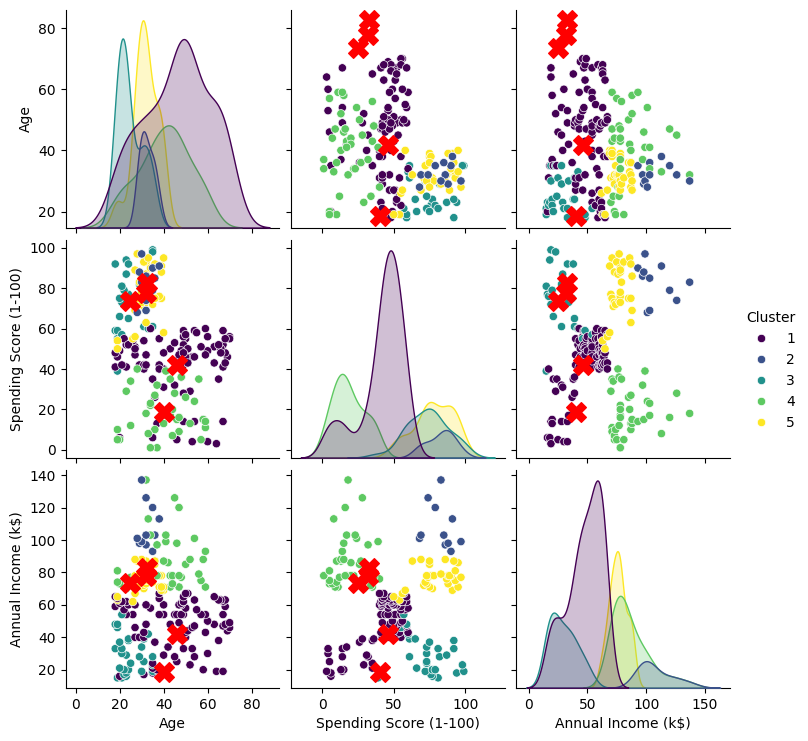

In [95]:
pairplot = sns.pairplot(df, vars=['Age', 'Spending Score (1-100)', 'Annual Income (k$)'], hue='Cluster', palette='viridis')

for i in range(len(pairplot.axes)):
    for j in range(len(pairplot.axes[i])):
        if i != j:  # Solo para los scatterplots
            for centroid in centroids:
                pairplot.axes[i, j].scatter(centroid[0], centroid[1], c='red', s=200, marker='X', label='Centroid')

plt.show()

#### Analisis de los resultados

In [96]:
# Valor Promedio de cada cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
1,46,47,41
2,32,108,82
3,24,29,73
4,40,87,18
5,31,76,77


##### Clusters basado en Income y Spending Score

Este proximo grafico nos enseña lo siguiente:
* Las personas que ganan un income entre 40k y 70k tienen un Spending Score mediano 40 y 60.
* Las personas que ganan alto

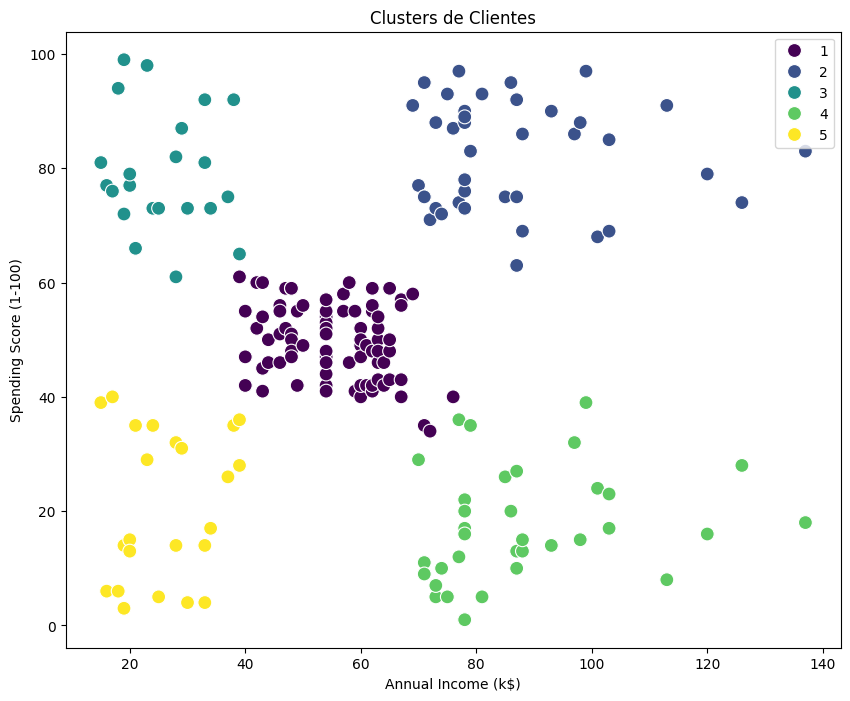

In [97]:
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 Clusters
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']]) # No incluye Age en este escenario

df['Cluster'] = kmeans.labels_ + 1

# Scatter plot de Annual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters de Clientes')
plt.legend()
plt.show()

##### Clusters basado en Age y Spending Score

Aqui se puede apreciar que:
* Despues de los 40 años el spending score de las personas disminuye. Significando que mayores de 40 gastan menos
* Personas jovenes tienden a gastar mas y tienen un Spending Score mayor.

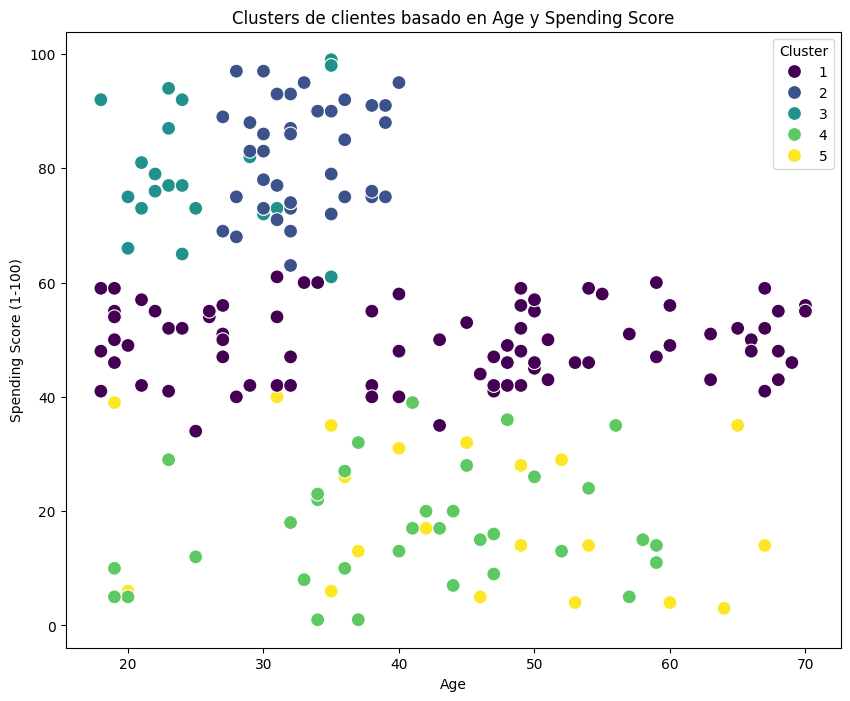

In [98]:
# Scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

plt.title('Clusters de clientes basado en Age y Spending Score')

plt.show()

##### Distribución de Gender a traves de los clusters

Desde la Exploración de Datos que se trabajo al principio se conocia que en la data hay mas clientes mujeres que hombres.

En este grafico se puede apreciar como se distribuyo entre los clusters.

Se puede concluir que las mujeres forman parte esecial de un centro comercial sin importar la edad o income generado.

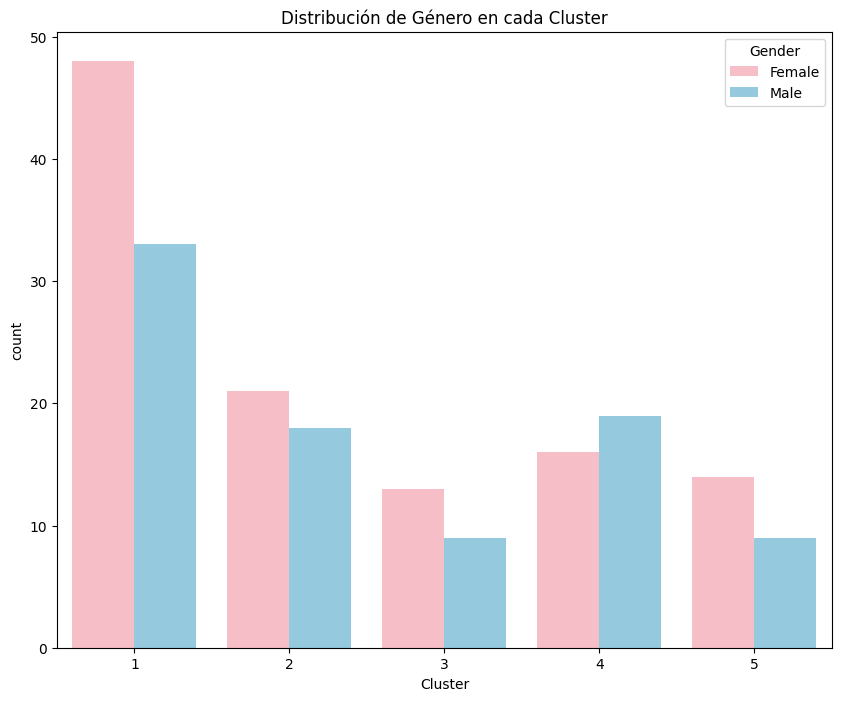

In [99]:
plt.figure(figsize=(10, 8))
custom_colors = ['#FFB6C1', '#87CEEB'] # color rosa y azul
sns.countplot(data=df, x='Cluster', hue='Gender', palette = custom_colors)

plt.title('Distribución de Género en cada Cluster')

plt.show()

### PCA (Principal Component Analysis)- Unsupervised Learning Algorithm

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


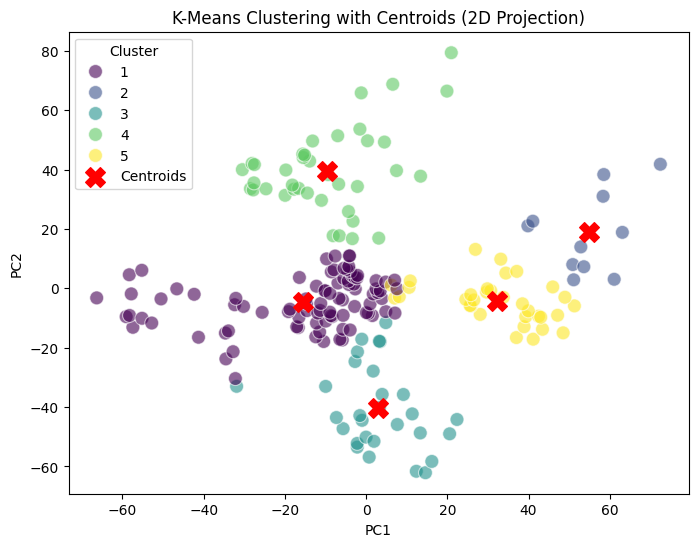

In [100]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]) + 1

# Proyectar la data 3D a 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']])

# Creando un df con los componentes de PCA
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# 2D PCA data con clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Centroides
centroids = kmeans.cluster_centers_
centroids_2d = pca.transform(centroids[:, [0, 1, 2]])  # Project centroids to 2D
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering with Centroids (2D Projection)")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

plt.show()


In [101]:
# Cantidad de valores en cada Cluster
print(df['Cluster'].value_counts())

Cluster
1    89
4    38
5    33
3    29
2    11
Name: count, dtype: int64


- In cluster 1 there's 89 data points
- In cluster 4 there's 38 data points
- In cluster 5 there's 33 data points
- In cluster 3 there's 29 data points
- In cluster 2 there's 11 data points

In [102]:
data = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']]

# Aplicando PCA
pca = PCA(n_components=2)
pca.fit(data)

# Compnentes de cada componente principal
print("PC:")
print(pca.components_)

PC:
[[-0.1889742   0.7859965   0.58864102]
 [ 0.1309652  -0.57391358  0.80837573]]


- 1st row (PC1): [-0.1889742   0.7859965   0.58864102]
- 2nd row (PC2): [ 0.1309652  -0.57391358  0.80837573]